## Basic  Preparation for MIMIC-IV Dataset for Discharge Codes Longitudinal Predictions Task

### Main Preparation Steps

1. Load dataframes from the downloaded dataset from Physionet.
2. Select patients with at least two admissions (i.e. for sequential prediction task).
3. Map subjects to single ethnicity in admissions.
4. Export three tables to the cohort directory:
    1. `adm_df.csv.gz`: for admission information.
    2. `static_df.csv.gz`: for demographic information (DoB, ethnicity, gender).
    3. `dx_df.csv.gz`: for discharge codes information linked to each admission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Set the raw dataset directory (folder) absolute path.
mimic_dir = '/home/asem/GP/ehr-data/physionet.org/files/mimiciv/2.2'

# Set the target cohort directory.
cohort_dir = '/home/asem/GP/ehr-data/mimic4-cohort'
Path(cohort_dir).mkdir(parents=True, exist_ok=True)



In [3]:
adm_df = pd.read_csv(f'{mimic_dir}/hosp/admissions.csv.gz')

In [4]:
adm_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [5]:
f'#subjects: {len(set(adm_df.subject_id))}'

'#subjects: 180733'

<AxesSubplot:>

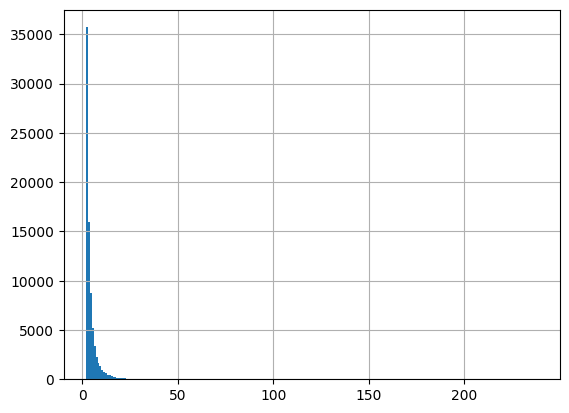

In [6]:
patients_n_admission = adm_df.groupby('subject_id').size()
patients_n_admission[patients_n_admission > 1].hist(bins=patients_n_admission.max())

In [7]:
# In GRAM paper, all patients with at least 2 visits were utilized (n=7537).
f'#subjects (n_admissions> 1): {len(patients_n_admission[patients_n_admission > 1])}'

'#subjects (n_admissions> 1): 79535'

#### Filter qualified subjects

In [8]:
qualified_subjects = patients_n_admission[patients_n_admission > 1].index
adm_df = adm_df[adm_df.subject_id.isin(qualified_subjects)]

In [9]:
adm_df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
5,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431225,19999784,29956342,2121-01-31 00:00:00,2121-02-05 12:44:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1


In [10]:
def map_ethnicity(subj_df):
    
    def resolution(series):
        # Return the more detailed ethnicity (longer string)
        idx = series.apply(lambda s: len(s)).idxmax()
        return series.loc[idx]
    
    eth_df = subj_df['race']
    eth_df = eth_df[~eth_df.str.contains('UNKNOWN')]
    eth_df = eth_df[~eth_df.str.contains('UNABLE')]
    eth_df = eth_df[~eth_df.str.contains('DECLINED')]
    ethnicity_set = set(eth_df)
    
    if len(ethnicity_set) == 0:
        return 'UNKNOWN'
    if len(ethnicity_set) == 1:
        (ethnicity,) = ethnicity_set
        return ethnicity
    
    if eth_df.str.contains('WHITE').all():
        return resolution(eth_df)
    if eth_df.str.contains('ASIAN').all():
        return resolution(eth_df)
    if eth_df.str.contains('HISPANIC').all():
        return resolution(eth_df)
    if len(ethnicity_set) > 1:
        print(f'Unresolved (return "UNKNOWN"): {ethnicity_set}')
    
    return 'UNKNOWN'

subject_eth_df = adm_df.groupby('subject_id').apply(map_ethnicity)

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC/LATINO - DOMINICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC/LATINO - CUBAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC OR LATINO', 'WHITE'}
Unresolved (ret

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'ASIAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'MULTIPLE RACE/ETHNICITY', 'WHIT

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'AMERICAN INDIAN/ALASKA NATIVE', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - DOMINICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN', 'BLACK/CA

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC OR LATINO', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC OR LATINO', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'BLACK/AFRICAN A

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'ASIAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'MULTIPLE RACE/ETHNICITY'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/CAPE 

Unresolved (return "UNKNOWN"): {'ASIAN - ASIAN INDIAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - MEXICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - RUSSIAN', 'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'OTHER'}
Unresolved

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'ASIAN - CHINESE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'WHITE - BRAZILIAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - MEXICAN', 'OTHER', 'HISPANIC OR LATINO'

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'ASIAN - ASIAN INDIAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - HONDURAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKN

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'HISPANIC OR LATINO', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'MULTIPLE RACE/ETHNICITY', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'AMERICAN INDIAN/ALASKA NATIVE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'ASIAN'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'MULTIPLE RACE/ETHNICITY'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN 

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE - RUSSIAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - OTHER EUROPEAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN'}
Unresolved (return "UNKNOWN

Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'WHITE - BRAZILIAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC/LATINO - PUERTO RICAN'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - MEXICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - CUBAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHE

Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'HISPANIC/LATINO - MEXICAN', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'WHITE'}
Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'HISPANIC OR LATINO'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'MULTIPLE RACE/ETHNICITY', 'WHITE'

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN'}
Unresolved (return "UNKNOWN"): {'HISPANIC OR LATINO', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'BLACK/CARIBBEAN ISLAND'}
Unresolved (return "UNKNOWN"): {'SOUTH AMERICAN', 'HISPANIC/LATINO - SALVADORAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}
Unresolved (return "UNKNOWN"): {'PORTUGUESE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'ASIAN - CH

In [11]:
patients_df = pd.read_csv(f'{mimic_dir}/hosp/patients.csv.gz')
patients_df = patients_df[patients_df.subject_id.isin(qualified_subjects)].reset_index(drop=True)
patients_df['race'] = patients_df.subject_id.map(subject_eth_df)
patients_df = patients_df[['subject_id', 'gender', 'anchor_age', 'anchor_year', 'race']]
patients_df.to_csv(f'{cohort_dir}/static_df.csv.gz', compression='gzip', index=False)

In [12]:
patients_df = pd.read_csv(f'{cohort_dir}/static_df.csv.gz')
patients_df.head()

,subject_id,gender,anchor_age,anchor_year,race
0,10000032,F,52,2180,WHITE
1,10000084,M,72,2160,WHITE
2,10000117,F,48,2174,WHITE
3,10000826,F,32,2146,WHITE
4,10000883,M,20,2124,WHITE


In [13]:
adm_df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
5,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431225,19999784,29956342,2121-01-31 00:00:00,2121-02-05 12:44:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1


In [14]:
adm_df = adm_df[['subject_id', 'hadm_id', 'admittime', 'dischtime']]
adm_df.to_csv(f'{cohort_dir}/adm_df.csv.gz', compression='gzip', index=False)


In [15]:
dx_df = pd.read_csv(f'{mimic_dir}/hosp/diagnoses_icd.csv.gz', dtype = {'icd_code': str, 'icd_version': str})
dx_df = dx_df[dx_df.icd_code.notnull()].reset_index(drop=True)
dx_df = dx_df[dx_df.subject_id.isin(qualified_subjects)].reset_index(drop=True)
dx_df = dx_df[['hadm_id', 'icd_code', 'icd_version']]
dx_df.to_csv(f'{cohort_dir}/dx_df.csv.gz', compression='gzip', index=False)